In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf
import pandas_datareader as pdr
import os
import datetime
import numpy as np

In [17]:
# yf download 
# check null data

start = datetime.datetime(2023,11,24)
end = datetime.datetime(2024,5,23)
df = yf.download("AAPL", start, end) 

null_count = df.isna().sum() 
# df = df.dropna()# drop na 
print(null_count)

[*********************100%%**********************]  1 of 1 completed

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [25]:
# Resample 

start = datetime.datetime(2003,1,1)
end = datetime.datetime(2015,12,31)

business_range = pd.date_range(start=start, end=end, freq='B')

print(f'Business days = {business_range.shape[0]}')

df = yf.download("AAPL", start, end) 
df = df['Close'].to_frame()
print(f'Presented Business days = {df.shape[0]}')

df_resample = df.resample('B').bfill() 


[*********************100%%**********************]  1 of 1 completed

Business days = 3392
Presented Business days = 3272


In [142]:
# Download Apple stock price data from Yahoo Finance
# period
symbol = 'AAPL'
df = yf.download(symbol, period='6mo')

[*********************100%%**********************]  1 of 1 completed


In [143]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-17,189.509995,190.809998,189.179993,189.869995,189.869995,41282900
2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,50944900


(19685.0, 19866.0)

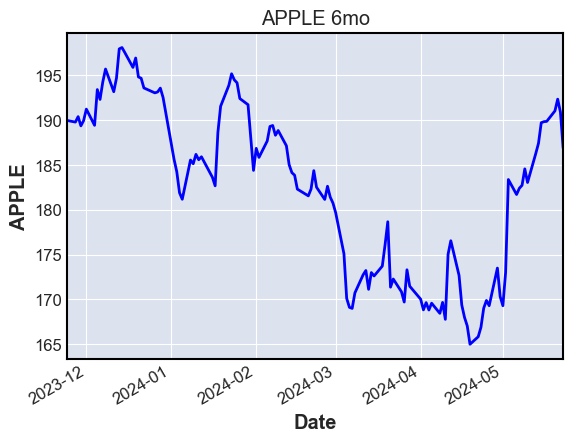

In [38]:
# Print a chart with pandas plotting

start = datetime.datetime(2023,11,24)
end = datetime.datetime(2024,5,23)

apple_chart = df.Close.plot(style='b') 
apple_chart.set_title("APPLE 6mo") 
apple_chart.set_ylabel("APPLE") 
apple_chart.set_xlim(str(start), str(end))

Text(0, 0.5, 'APPLE')

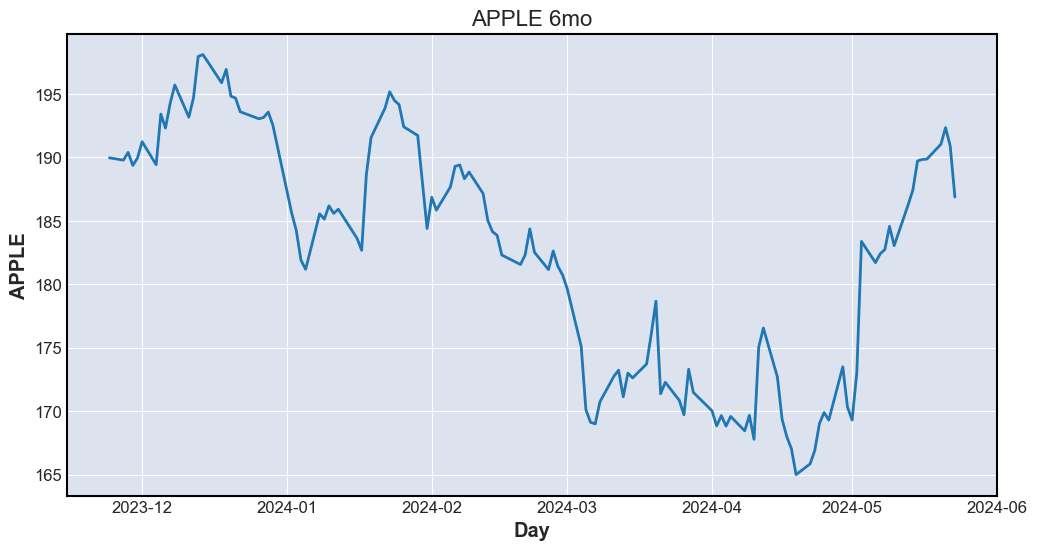

In [39]:
# Plot APPLE stock price with matplotlib

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.title('APPLE 6mo', fontsize=16)
plt.xlabel('Day')
plt.ylabel('APPLE')

<Axes: xlabel='Date'>

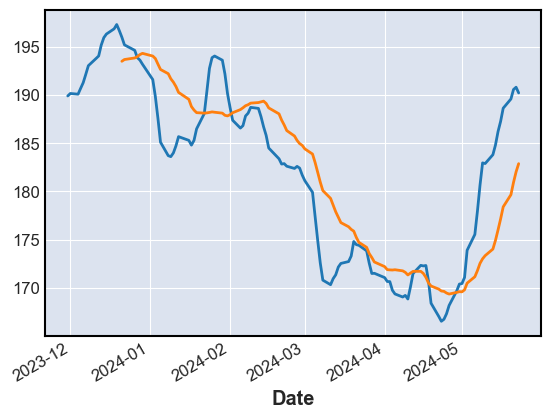

In [144]:
# Rolling windows
df['Close'].rolling(window=5).mean().plot()
df['Close'].rolling(window=20).mean().plot()

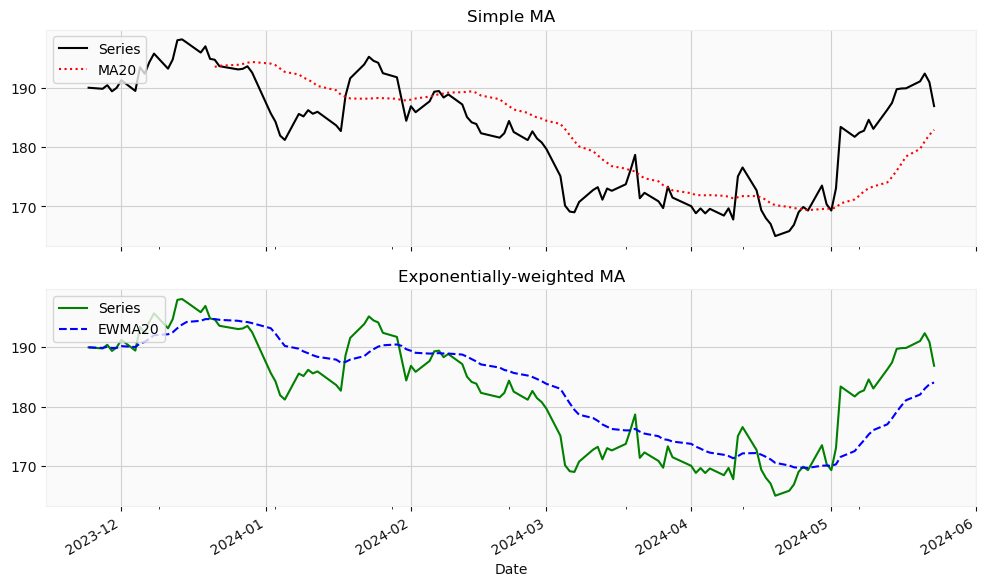

In [126]:
# Simple movinga average
ma20 = df['Close'].rolling(20).mean()

# 20-day moving average of AAPL stock price with exponential weighting
ewma20 = df['Close'].ewm(span=20).mean() # alpha = 2 / (span +1) for span >= 1

# Plot the results
fig, axes = plt.subplots(nrows=2, ncols=1, 
                         sharex=True, 
                         sharey=True, 
                         figsize=(12,7))

df['Close'].plot(style='k-', ax=axes[0], label='Series')
ma20.plot(style='r:', ax=axes[0], label='MA20')
axes[0].legend(loc='upper left')
axes[0].set_title('Simple MA')

df['Close'].plot(style='g-', ax=axes[1], label='Series')
ewma20.plot(style='b--', ax=axes[1], label='EWMA20')
axes[1].set_title('Exponentially-weighted MA')
axes[1].legend(loc='upper left')
plt.show()

In [145]:
df['LogReturn'] = np.log(df['Close']/
                        df['Close'].shift(1))
print(df.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-05-17  189.509995  190.809998  189.179993  189.869995  189.869995   
2024-05-20  189.330002  191.919998  189.009995  191.039993  191.039993   
2024-05-21  191.089996  192.729996  190.919998  192.350006  192.350006   
2024-05-22  192.270004  192.820007  190.270004  190.899994  190.899994   
2024-05-23  190.979996  191.000000  186.630005  186.880005  186.880005   

              Volume  LogReturn  
Date                             
2024-05-17  41282900   0.000158  
2024-05-20  44361300   0.006143  
2024-05-21  42309400   0.006834  
2024-05-22  34648500  -0.007567  
2024-05-23  50944900  -0.021283  


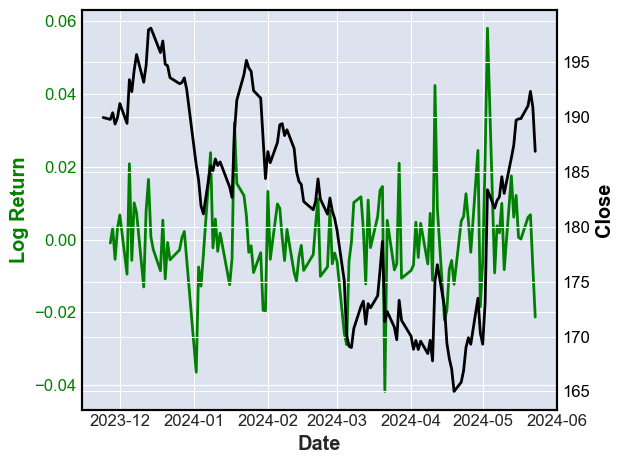

In [52]:
fig, ax1 = plt.subplots()

ax1.plot(df.index, df['LogReturn'],'g-')
ax1.set_xlabel('Date')       
ax1.set_ylabel('Log Return', color='g')
ax1.tick_params('y', colors='g')

ax2 = ax1.twinx()
ax2.plot(df.index, df['Close'],'k-')
ax2.set_ylabel('Close', color='k')
ax2.tick_params('y', colors='k')
plt.tight_layout()
plt.show()

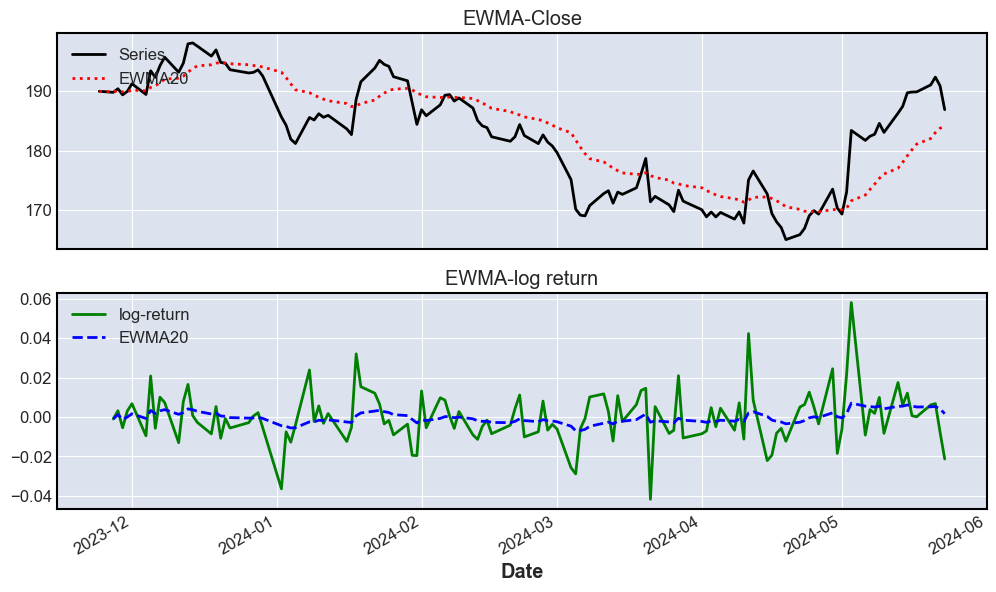

In [55]:
# sharex & sharey 

log_return_ewma20 = df['LogReturn'].ewm(span=20).mean()

# 60-day moving average of AAPL stock price with exponential weighting
ewma20 = df['Close'].ewm(span=20).mean() # alpha = 2 / (span +1) for span >= 1

# Plot the results
fig, axes = plt.subplots(nrows=2, ncols=1, 
                         sharex=True, 
                        #  sharey=True, 
                         figsize=(12,7))
df['Close'].plot(style='k-', ax=axes[0], label='Series')
ewma20.plot(style='r:', ax=axes[0], label='EWMA20')
axes[0].legend(loc='upper left')
axes[0].set_title('EWMA-Close')

df['LogReturn'].plot(style='g-', ax=axes[1], label='log-return')
log_return_ewma20.plot(style='b--', ax=axes[1], label='EWMA20')
axes[1].set_title('EWMA-log return')
axes[1].legend(loc='upper left')
plt.show()

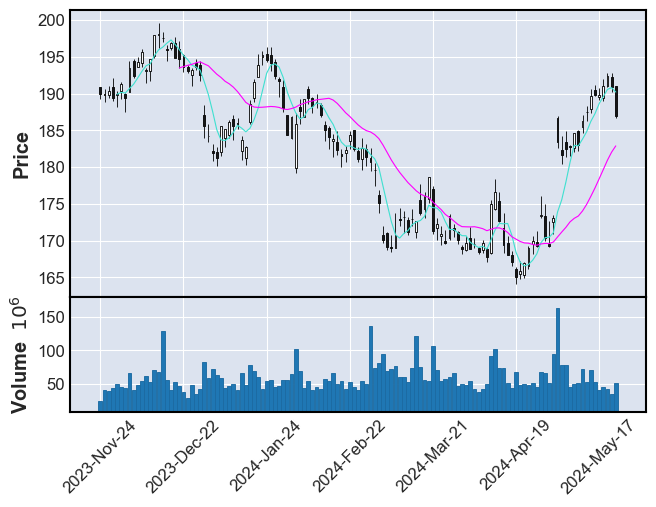

In [3]:
# Note that the mav argument in the plot method is only for 
# simple moving average (SMA)

mpf.plot(df, type='candle', mav=(5, 20), volume=True)

- Exponentially weighted moving average

<img src="image/ewma.png" alt="drawing" style="width:550px;"/>

- Span

<img src="image/span.png" alt="drawing" style="width:475px;"/>

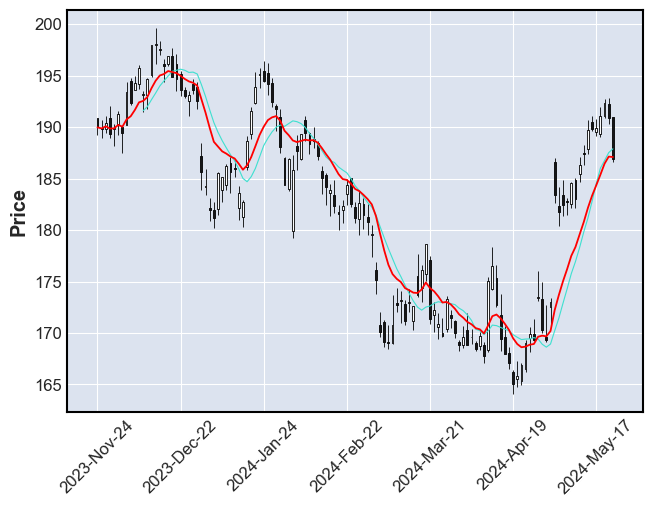

In [8]:
# Exponentially weighted moving average
# Copy df to a new dataframe df2

df2 = df.copy()
df2['ema12'] = df2['Close'].ewm(span=12).mean()

ema12plot = mpf.make_addplot(df2['ema12'], color ='red', ylabel='EMA12')
mpf.plot(df2, type='candle', mav=12, addplot=ema12plot)

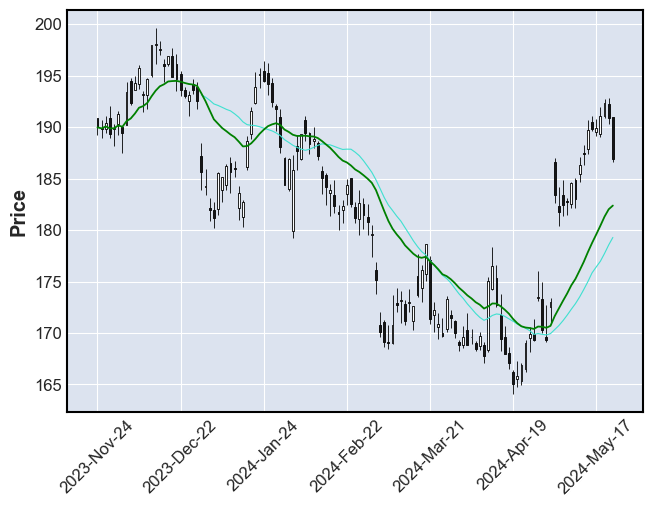

In [9]:
df2['ema26'] = df2['Close'].ewm(span=26).mean()
ema26plot = mpf.make_addplot(df2['ema26'], color ='green', ylabel='EMA26')
mpf.plot(df2, type='candle', mav=26, addplot=ema26plot)

### Stochastic Oscillator

![%K](image/formula.png)

- %D: 3 period MA of the %K line 

- %SD: 3 period MA of %D, a smoother version called 'slow stochastics'

- The upper(UL) and lower(DL) extremes are the 80 and 20 values.

In [57]:
df.head(1)

,Open,High,Low,Close,Adj Close,Volume,LogReturn
Date,,,,,,,
2023-11-24,190.869995,190.899994,189.25,189.970001,189.470901,24048300,NaN


In [73]:
# L14: the lowest low for the last 14 periods
window = 14
L14_5 = df['Low'].rolling(window).min().iloc[26:31]
print(f'L14 for 5 periods \n {L14_5} \n')

# H14: the highest high for the last 14 periods
H14_5 = df['High'].rolling(window).max().iloc[26:31]
print(f'H14 for 5 periods \n {H14_5} \n')

# %K = [(C - L14) / (H14 - L14)] * 100
L14 = df['Low'].rolling(window).min()
H14 = df['High'].rolling(window).max()

K = ((df['Close'] - L14) 
     / (H14 - L14)) * 100
print(f'%K for 5 periods \n {K.iloc[26:31]} \n')

# 0 <= %K <= 100
# %K = 0 -> C = L14
# %K = 1 -> C = H14

# A very high reading (over 80) would put the closing price 
# near the top of the range.
# Overbought

# A very low reading (under 20) would put the closing price 
# near the bottom of the range.
# Oversold

L14 for 5 periods 
 Date
2024-01-03    183.429993
2024-01-04    180.880005
2024-01-05    180.169998
2024-01-08    180.169998
2024-01-09    180.169998
Name: Low, dtype: float64 

H14 for 5 periods 
 Date
2024-01-03    199.619995
2024-01-04    199.619995
2024-01-05    198.399994
2024-01-08    197.679993
2024-01-09    197.679993
Name: High, dtype: float64 

%K for 5 periods 
 Date
2024-01-03     5.064899
2024-01-04     5.496261
2024-01-05     5.540289
2024-01-08    30.782416
2024-01-09    28.383797
dtype: float64 



In [78]:
# second line (%D) is a 3 period MA of the $K line 
smooth_window = 3

K = ((df['Close'] - L14) 
     / (H14 - L14)) * 100
# print(f'%K for 5 periods \n {K.iloc[26:31]} \n')

# Fast stochastic
D = K.rolling(smooth_window).mean()
print(f'%D for 5 periods \n {D.iloc[26:31]} \n')

# Slow stochastic
SD = D.rolling(smooth_window).mean()
print(f'%SD for 5 periods \n {SD.iloc[26:31]} \n')

%K for 5 periods 
 Date
2024-01-03     5.064899
2024-01-04     5.496261
2024-01-05     5.540289
2024-01-08    30.782416
2024-01-09    28.383797
dtype: float64 

%D for 5 periods 
 Date
2024-01-03    11.023922
2024-01-04     7.228801
2024-01-05     5.367150
2024-01-08    13.939656
2024-01-09    21.568834
dtype: float64 

%SD for 5 periods 
 Date
2024-01-03    17.832512
2024-01-04    12.439577
2024-01-05     7.873291
2024-01-08     8.845202
2024-01-09    13.625213
dtype: float64 



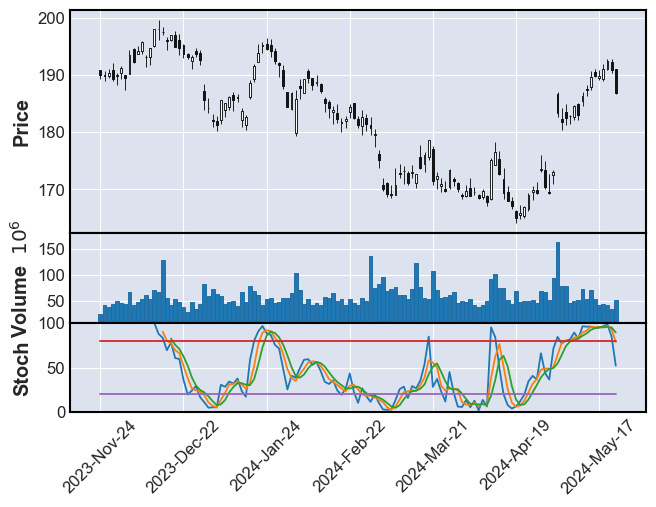

In [79]:
def Stochastic(df, window, smooth_window):
    
    stochastic = pd.DataFrame()
    stochastic['%K'] = ((df['Close'] - df['Low'].rolling(window).min()) 
            / (df['High'].rolling(window).max() - df['Low'].rolling(window).min())) * 100
    stochastic['%D'] = stochastic['%K'].rolling(smooth_window).mean()
    stochastic['%SD'] = stochastic['%D'].rolling(smooth_window).mean()
    stochastic['UL'] = 80
    stochastic['DL'] = 20
    
    return stochastic

stochastic = Stochastic(df, 14, 3)
stochastic_plot = [
mpf.make_addplot((stochastic[['%K', '%D', '%SD', 'UL', 'DL']]), ylim=[0,100], panel=2, ylabel='Stoch')
]

mpf.plot(df, type='candle', volume=True, addplot=stochastic_plot)

/var/folders/vg/0cvhzl1x62s7r9y4b3xbzvdr0000gn/T/ipykernel_63680/93245865.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax1.plot(df.index, df['Close'],'k-', color='black', label='close')


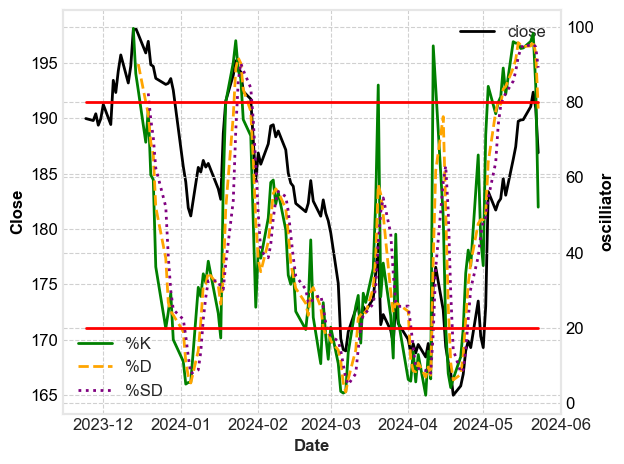

In [105]:
fig, ax1 = plt.subplots()

ax1.plot(df.index, df['Close'],'k-', color='black', label='close')
ax1.set_xlabel('Date')       
ax1.set_ylabel('Close', color='black')
ax1.legend()
ax1.tick_params('y', colors='black')

# '%K', '%D', '%SD', 'UL', 'DL'

ax2 = ax1.twinx()
ax2.plot(df.index, stochastic['%K'], color='green', label='%K')
ax2.plot(df.index, stochastic['%D'], color='orange', linestyle='dashed', label='%D')
ax2.plot(df.index, stochastic['%SD'], color='purple', linestyle='dotted', label='%SD')
ax2.plot(stochastic['UL'], 'r-')
ax2.plot(stochastic['DL'], 'r-')
ax2.set_ylabel('oscilliator', color='k')
ax2.legend()
ax2.tick_params('y', colors='k')
plt.tight_layout()
plt.show()

In [106]:
# To plot other types of moving average like exponential moving average (EMA), 
# we will need to calculate and add it to the chart separately
# EMA reacts more significantly to recent price changes than a simple moving average (SMA)

# Add MACD as subplot
def MACD(df, window_fast, window_slow, window_signal):
    macd = pd.DataFrame()
    
    macd['ema_fast'] = df['Close'].ewm(span=window_fast).mean()
    macd['ema_slow'] = df['Close'].ewm(span=window_slow).mean()
    
    macd['macd'] = macd['ema_fast'] - macd['ema_slow']

    macd['signal'] = macd['macd'].ewm(span=window_signal).mean()

    macd['diff'] = macd['macd'] - macd['signal']
    
    macd['bar_positive'] = macd['diff'].map(lambda x: x if x > 0 else 0)
    macd['bar_negative'] = macd['diff'].map(lambda x: x if x < 0 else 0)
    return macd

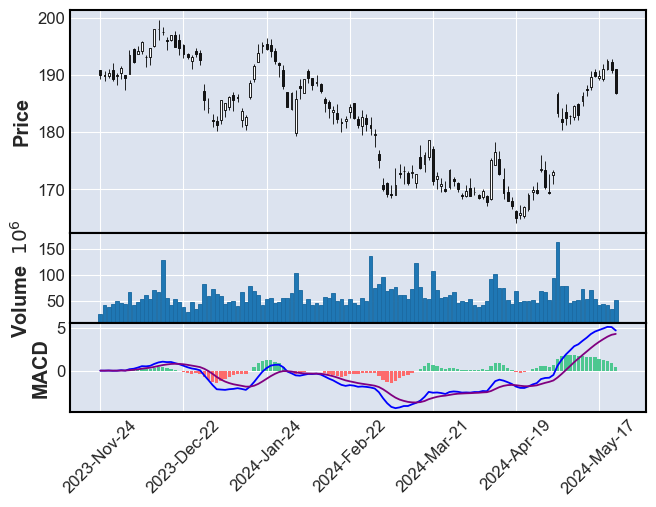

In [128]:
macd = MACD(df, 12, 26, 9)

macd_plot = [
    mpf.make_addplot((macd['macd']), color='blue', panel=2, ylabel='MACD', secondary_y=False),
    mpf.make_addplot((macd['signal']), color='purple', panel=2, secondary_y=False),
    mpf.make_addplot((macd['bar_positive']), type='bar', color='#4dc790', panel=2),
    mpf.make_addplot((macd['bar_negative']), type='bar', color='#fd6b6c', panel=2)
]

mpf.plot(df, type='candle', volume=True, addplot=macd_plot)

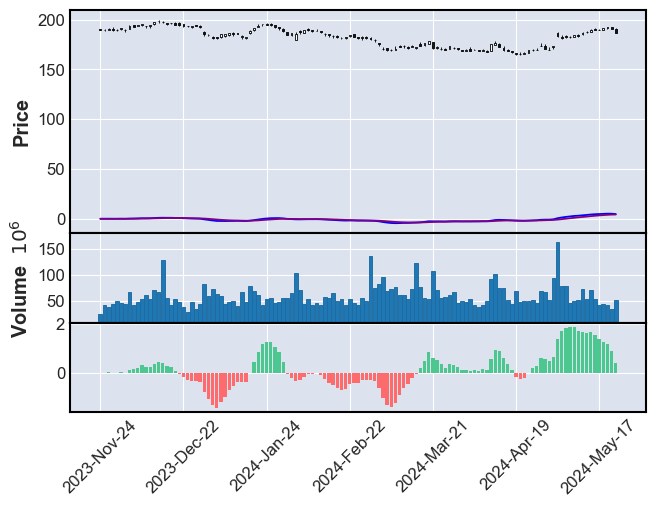

In [134]:
# Panel

macd = MACD(df, 12, 26, 9)

macd_plot = [
    mpf.make_addplot((macd['macd']), color='blue', panel=0, ylabel='MACD', secondary_y=False),
    mpf.make_addplot((macd['signal']), color='purple', panel=0, secondary_y=False),
    mpf.make_addplot((macd['bar_positive']), type='bar', color='#4dc790', panel=2),
    mpf.make_addplot((macd['bar_negative']), type='bar', color='#fd6b6c', panel=2)
]

mpf.plot(df, type='candle', volume=True, addplot=macd_plot)

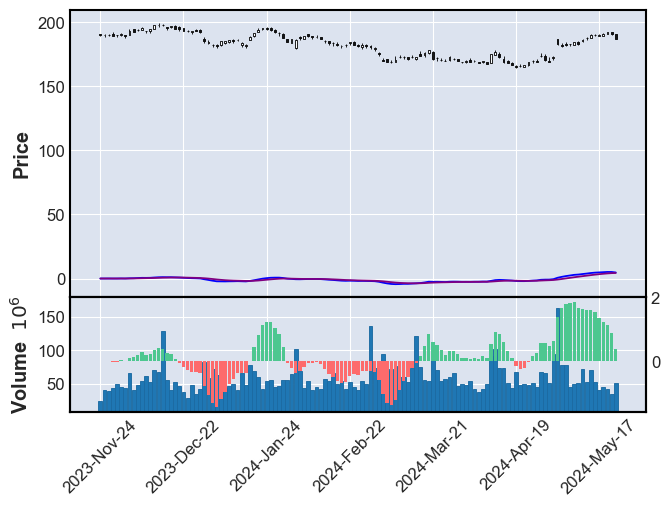

In [137]:
macd = MACD(df, 12, 26, 9)

macd_plot = [
    mpf.make_addplot((macd['macd']), color='blue', panel=0, ylabel='MACD', secondary_y=False),
    mpf.make_addplot((macd['signal']), color='purple', panel=0, secondary_y=False),
    mpf.make_addplot((macd['bar_positive']), type='bar', color='#4dc790', panel=1),
    mpf.make_addplot((macd['bar_negative']), type='bar', color='#fd6b6c', panel=1)
]

mpf.plot(df, type='candle', volume=True, addplot=macd_plot)

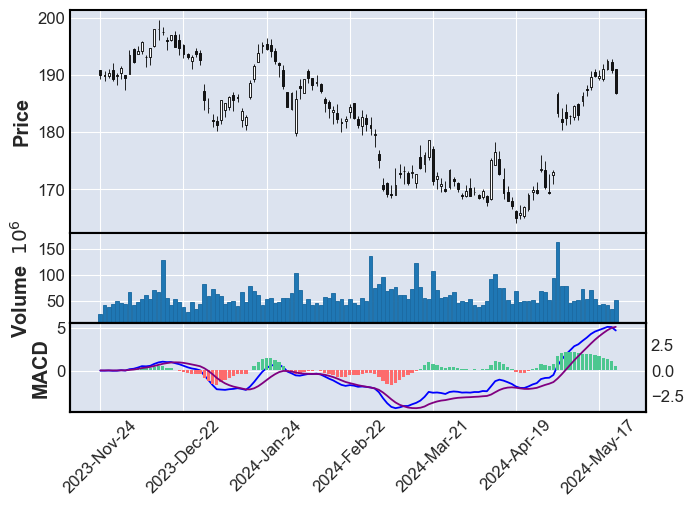

In [135]:
# secondar_y

macd = MACD(df, 12, 26, 9)

macd_plot = [
    mpf.make_addplot((macd['macd']), color='blue', panel=2, ylabel='MACD'),
    mpf.make_addplot((macd['signal']), color='purple', panel=2),
    mpf.make_addplot((macd['bar_positive']), type='bar', color='#4dc790', panel=2),
    mpf.make_addplot((macd['bar_negative']), type='bar', color='#fd6b6c', panel=2)
]

mpf.plot(df, type='candle', volume=True, addplot=macd_plot)

#### Practice with Google stock data

In [16]:
# 6-month stock price data for Google
google = yf.download('GOOG', period='6mo')

[*********************100%%**********************]  1 of 1 completed


Practice
1. Draw the candle chart.
2. Plot the simple moving average with multiple periods.
3. Plot the exponential moving averages with 12 days and 26 days.
4. Plot the difference between EMAs with periods of 12 and 26 days.

1. Draw the candle chart.

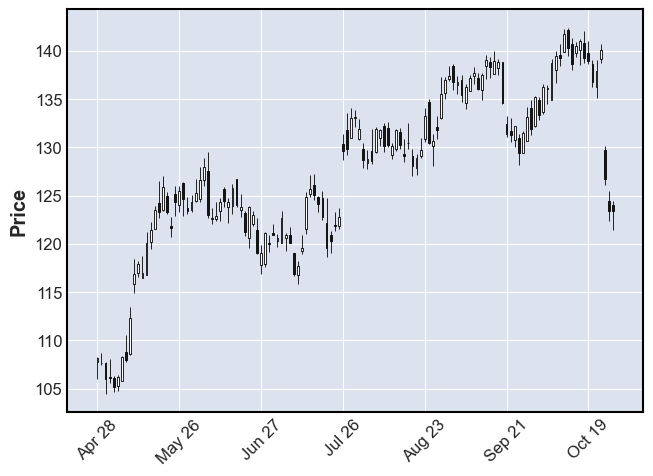

In [17]:
mpf.plot(google, type='candle')

2. Plot the simple moving average with multiple periods. 

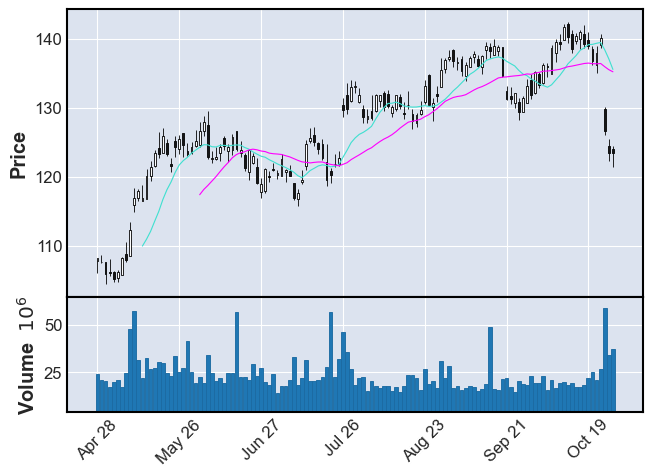

In [18]:
mpf.plot(google, type='candle', mav=(12, 26), volume=True)

3. Plot the exponential moving average.

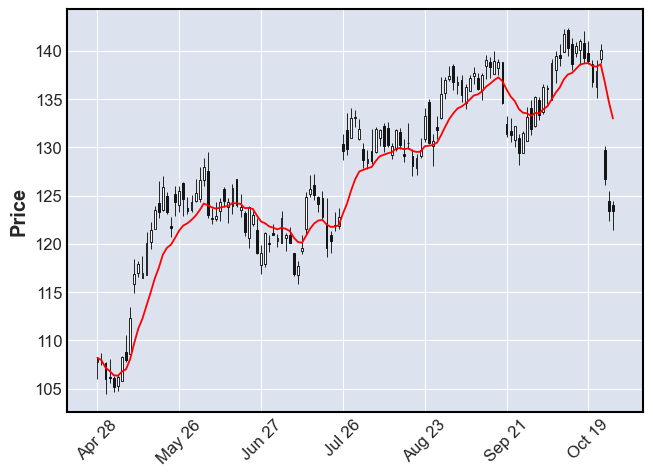

In [19]:
google['ewm12'] = google['Close'].ewm(span=12).mean()
ewm12plot = mpf.make_addplot(google['ewm12'], color ='red')
mpf.plot(google, type='candle', addplot=ewm12plot)

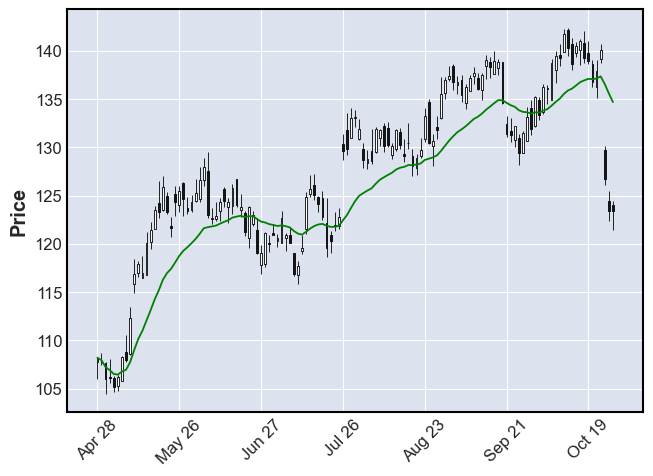

In [20]:
google['ewm26'] = google['Close'].ewm(span=26).mean()
ewm26plot = mpf.make_addplot(google['ewm26'], color ='green')
mpf.plot(google, type='candle', addplot=ewm26plot)

4. Plot the difference between 2 MAs.

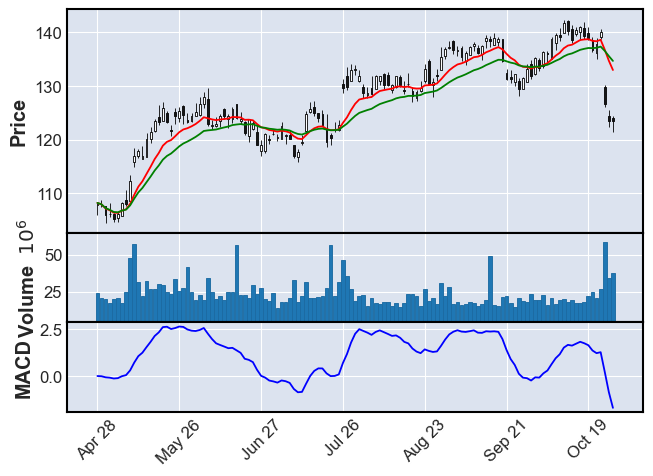

In [21]:
google['macd'] = google['ewm12'] - google['ewm26']
macdplot = mpf.make_addplot(google['macd'], color='blue', panel=2, ylabel='MACD')
mpf.plot(google, type='candle', volume=True, addplot=[macdplot, ewm12plot, ewm26plot])

#### Tesla stock data

In [22]:
tesla = yf.download('TSLA', period='6mo')
tesla

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-28,160.899994,165.000000,157.320007,164.309998,164.309998,122515800
2023-05-01,163.169998,163.279999,158.830002,161.830002,161.830002,109015000
2023-05-02,161.880005,165.490005,158.929993,160.309998,160.309998,128259700
2023-05-03,160.009995,165.000000,159.910004,160.610001,160.610001,119728000
2023-05-04,162.710007,162.949997,159.649994,161.199997,161.199997,95108500
...,...,...,...,...,...,...
2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100


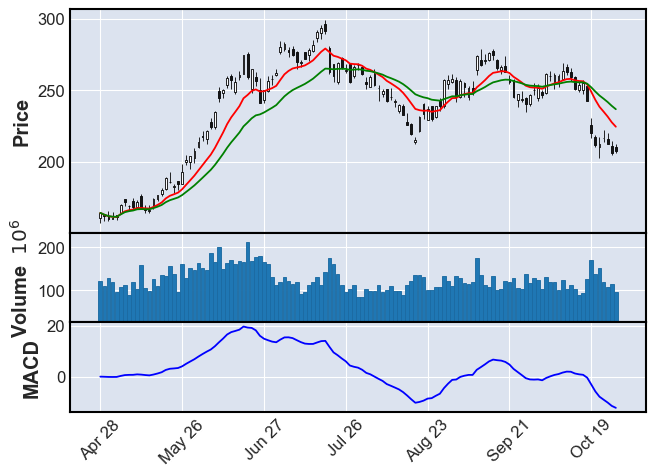

In [23]:
ewm12plot = mpf.make_addplot(tesla['Close'].ewm(span=12).mean(), color ='red', panel=0)
ewm26plot = mpf.make_addplot(tesla['Close'].ewm(span=26).mean(), color ='green', panel=0)
macdplot = mpf.make_addplot(tesla['Close'].ewm(span=12).mean() - tesla['Close'].ewm(span=26).mean(), 
                            color='blue', panel=2, ylabel='MACD')
mpf.plot(tesla, type='candle', addplot=[ewm12plot, ewm26plot, macdplot], volume=True)

### Add MACD as subplots

[Investopedia](https://www.investopedia.com/terms/m/macd.asp)

- The moving average convergence/divergence (MACD, or MAC-D) line is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA. The signal line is a nine-period EMA of the MACD line.

- MACD triggers technical signals when the MACD line crosses above the signal line (to buy) or falls below it (to sell).

- MACD can help gauge whether a security is overbought or oversold, alerting traders to the strength of a directional move, and warning of a potential price reversal.

- MACD can also alert investors to bullish/bearish divergences (e.g., when a new high in price is not confirmed by a new high in MACD, and vice versa), suggesting a potential failure and reversal.

- After a signal line crossover, it is recommended to wait for three or four days to confirm that it is not a false move.

In [3]:
def MACD(df, window_slow, window_fast, window_signal):
    macd = pd.DataFrame()
    macd['ema_slow'] = df['Close'].ewm(span=window_slow).mean()
    macd['ema_fast'] = df['Close'].ewm(span=window_fast).mean()
    macd['macd'] = macd['ema_slow'] - macd['ema_fast']
    macd['signal'] = macd['macd'].ewm(span=window_signal).mean()
    macd['diff'] = macd['macd'] - macd['signal']
    macd['bar_positive'] = macd['diff'].map(lambda x: x if x > 0 else 0)
    macd['bar_negative'] = macd['diff'].map(lambda x: x if x < 0 else 0)
    return macd

In [140]:
df = pd.DataFrame([[1, 2.12], [3.356, 4.567]])
print(df)
df.map(lambda x: x**2)

       0      1
0  1.000  2.120
1  3.356  4.567


,0,1
0,1.000000,4.494400
1,11.262736,20.857489


In [25]:
# 6-month stock price data for Apple
symbol = 'AAPL'
df = yf.download(symbol, period='6mo')

[*********************100%%**********************]  1 of 1 completed


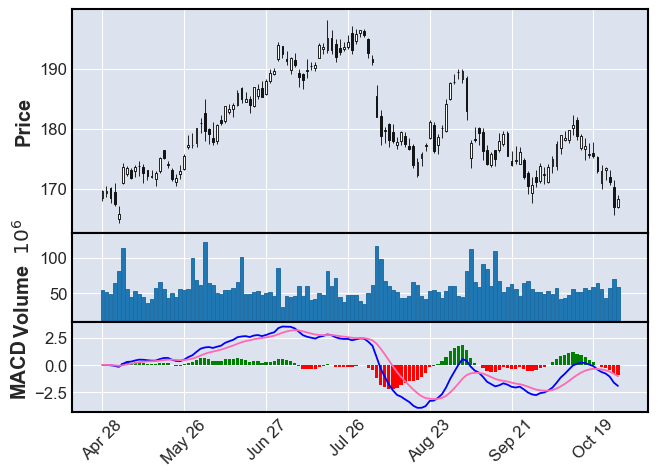

In [26]:
# Add MACD, signal, bar_positive, and bar_negative columns to df
macd = MACD(df, 12, 26, 9)
macd_plot = [
    mpf.make_addplot(macd['macd'], color='blue', panel=2, ylabel='MACD', secondary_y=False), # MACD line
    mpf.make_addplot(macd['signal'], color='hotpink', panel=2, secondary_y=False),           # signal line
    mpf.make_addplot(macd['bar_positive'], type='bar', color='green', panel=2),              # bullish
    mpf.make_addplot(macd['bar_negative'], type='bar', color='red', panel=2)                 # bearish
]

# Plot candlestick chart with additional plots
mpf.plot(df, type='candle', volume=True, addplot=macd_plot)

### Putting everything together

In [14]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf

symbol = 'GM'
df = yf.download(symbol, period='6mo')

[*********************100%%**********************]  1 of 1 completed


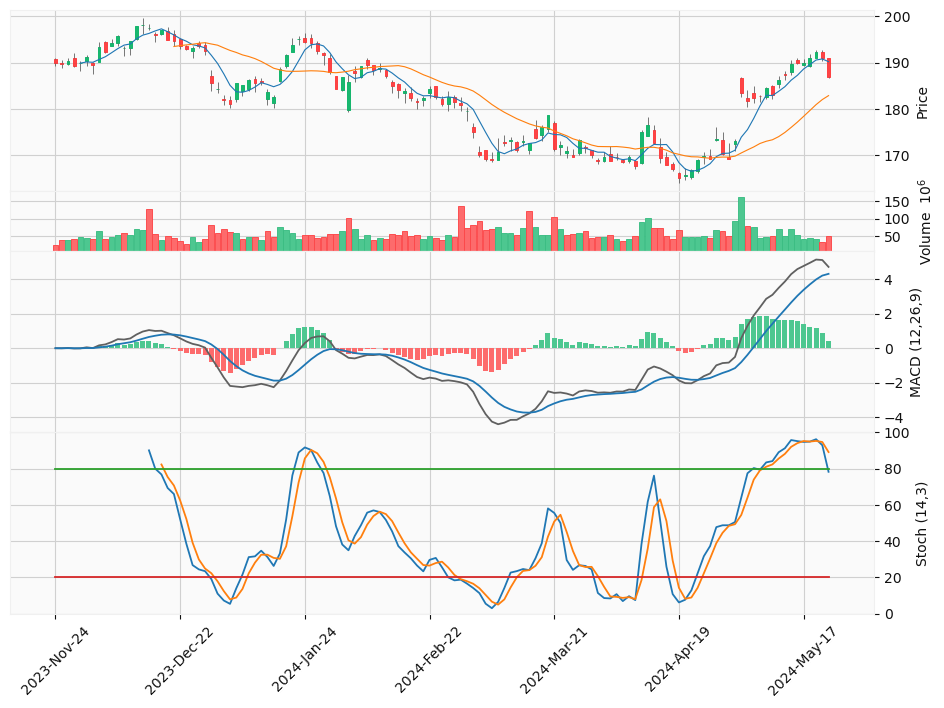

In [96]:
macd = MACD(df, 12, 26, 9)
stochastic = Stochastic(df, 14, 3)
plots = [
    mpf.make_addplot((macd['macd']), color='#606060', panel=2, ylabel='MACD (12,26,9)', secondary_y=False),
    mpf.make_addplot((macd['signal']), color='#1f77b4', panel=2, secondary_y=False),
    mpf.make_addplot((macd['bar_positive']), type='bar', color='#4dc790', panel=2),
    mpf.make_addplot((macd['bar_negative']), type='bar', color='#fd6b6c', panel=2),
    mpf.make_addplot((stochastic[['%D', '%SD', 'UL', 'DL']]), ylim=[0, 100], panel=3, ylabel='Stoch (14,3)')
]
mpf.plot(df, type='candle', style='yahoo', mav=(5,20), volume=True, addplot=plots,
         panel_ratios=(3,1,3,3), figscale=1.5)

In [97]:
from mplfinance import _styles

print(f'mpf styles: {_styles.available_styles()}')


mpf styles: ['binance', 'binancedark', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'tradingview', 'yahoo']


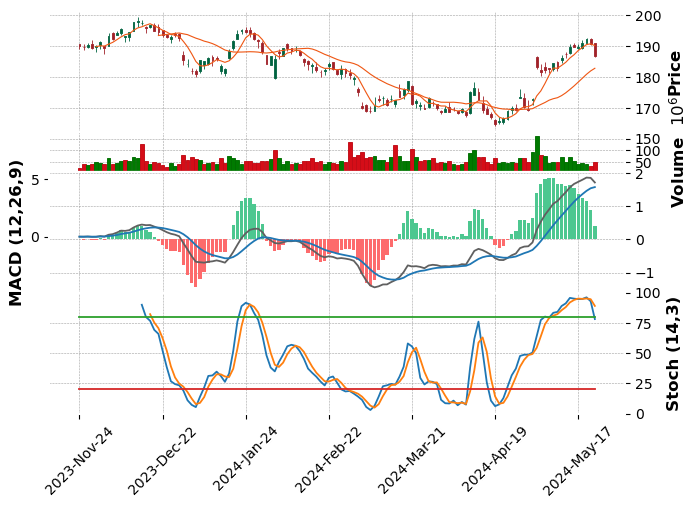

In [147]:
mpf.plot(df, 
         type='candle', 
         style='charles', 
         mav=(5,20), 
         volume=True, 
         addplot=plots,
         panel_ratios=(3,1,3,3))

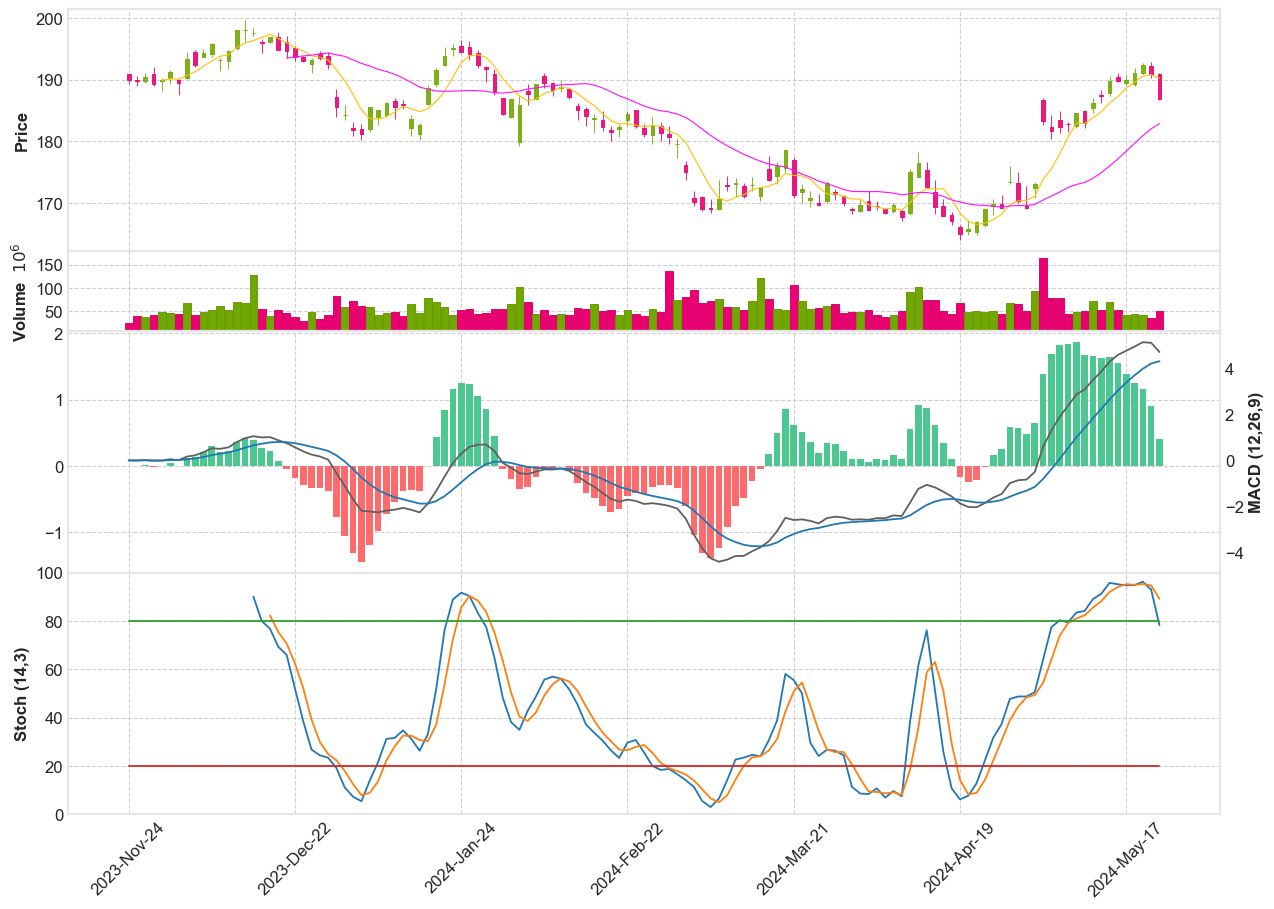

In [148]:
mpf.plot(df, 
         type='candle', 
         style='binance', 
         mav=(5,20), 
         volume=True, 
         addplot=plots,
         panel_ratios=(3,1,3,3),
         figscale=2)

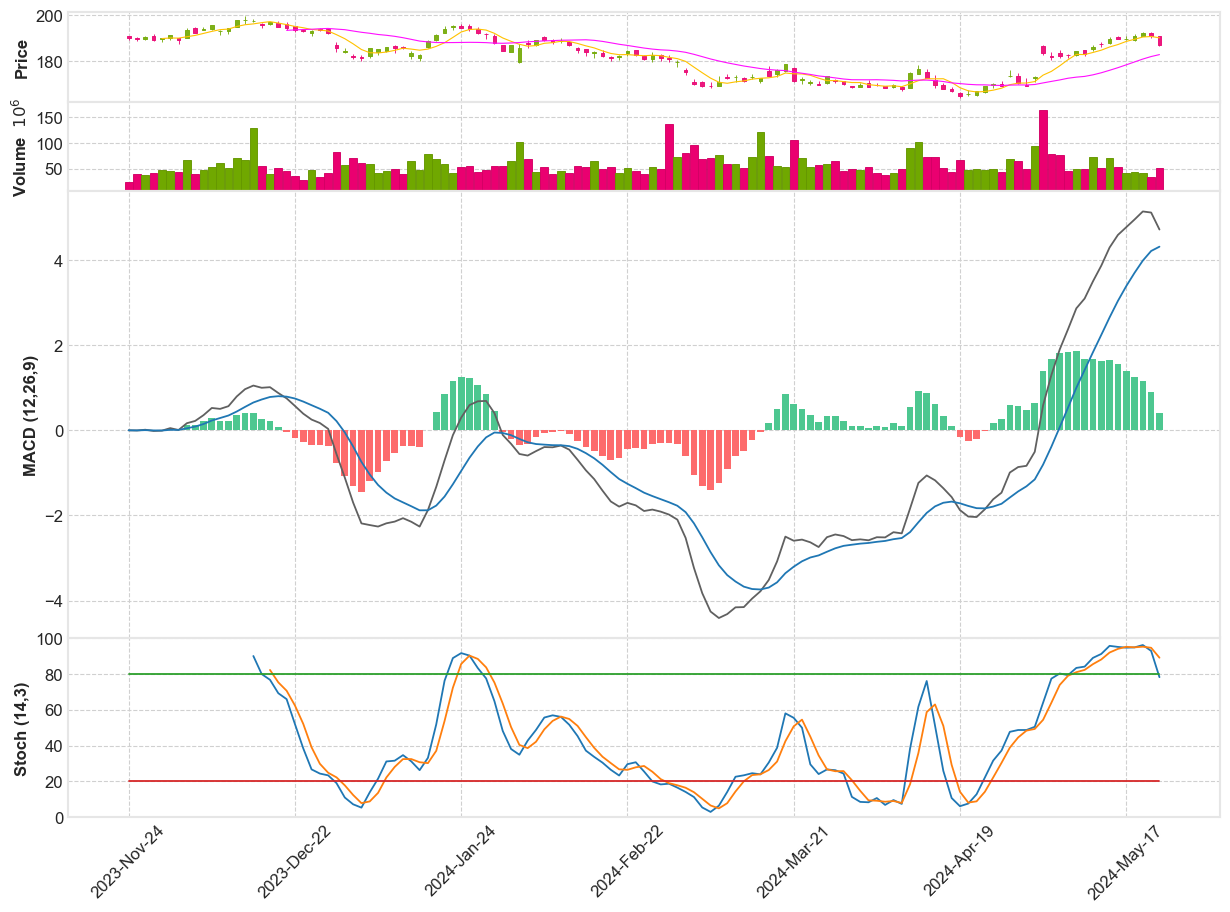

In [104]:
mpf.plot(df, 
         type='candle', 
         style='binance', 
         mav=(5,20), 
         volume=True, 
         addplot=plots,
         panel_ratios=(1,1,5,2),
         figscale=2)